In [2]:
import os
import numpy as np
import random
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# Data List Loading

In [4]:
rename = {
    'Baboon_': 'Baboon',
    'Elephant_': 'Elephant',
    'Honey_badger_': 'Honey_badger',
    'Honey_Badger': 'Honey_badger',
    'Mongoose_larger_gray': 'Mongoose_larger_grey',
    'Hippopotamus': 'Hippo'
}

In [5]:
seas_min_test_count = 20
root = '/home/zhmiao/datasets/ecology/Mozambique/'
season = 2
data_list_ori = [os.path.join(root, 'SplitLists', 'Mozambique_season_{}_all.txt.ori'.format(season)) for season in [1, 2]]

In [4]:
data_list_ori

['/home/zhmiao/datasets/ecology/Mozambique/SplitLists/Mozambique_season_1_all.txt.ori',
 '/home/zhmiao/datasets/ecology/Mozambique/SplitLists/Mozambique_season_2_all.txt.ori']

In [5]:
file_list = []
label_list = []
sec_list = []

for data_list in data_list_ori:
    
    with open(data_list, 'r') as f:
        
        for line in tqdm(f):
            
            line = line.replace('  ', ' ')
            
            if 'Honey Badger' in line:
                line = line.replace('Honey Badger', 'Honey_badger')
                
            if 'Mongoose_white tailed' in line:
                line = line.replace('Mongoose_white tailed', 'Mongoose_white_tailed')
                
            line_sp = line.split(' ')
            file = line_sp[0]
            label = line_sp[1]
            sec = line_sp[2]
            
            if file.split('/')[1] in rename.keys():
                file_sp = file.split('/')
                file_sp[1] = rename[file_sp[1]]
                file = '/'.join(file_sp)
                
            if os.path.exists(os.path.join(root, file)):
                file_list.append(file)
                label_list.append(label)
                sec_list.append(float(sec.replace('\n', '')))
            else:
                print(os.path.join(root, file))
            #if os.path.exists(os.path.join(root, file)):
            #    file_list.append(file)
            #    label_list.append(label)
        
file_list = np.array(file_list)
label_list = np.array(label_list)
sec_list = np.array(sec_list)

313020it [00:02, 155919.95it/s]
323582it [00:01, 166872.65it/s]


/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Sable/B07_EK000073.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Sable/B07_EK000074.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/C06_2016_08_31_08_54_55.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/C06_2016_08_31_08_54_56.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/F07_2016_10_22_10_08_12.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/F07_2016_10_22_10_08_13.JPG


In [6]:
unique_labels, label_counts = np.unique(label_list, return_counts=True)

Ghost


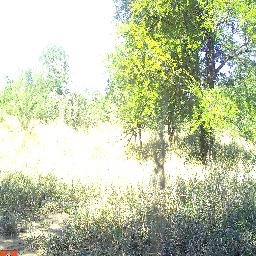

In [7]:
i = np.random.randint(0, len(file_list))
print(label_list[i])
Image.open(os.path.join(root, file_list[i]))

In [8]:
# min_count = seas_min_all_count[season]

min_count = 50

cat_sel = [(cat, count)
           for cat, count in zip(unique_labels[label_counts > min_count], label_counts[label_counts > min_count]) 
           if 'nknown' not in cat
           and 'other' not in cat
           and cat not in ['Ghost', 'Human', 'Fire', 'Setup', 'Rodent']]

sorted_cat = {i: ent for i, ent in enumerate(sorted(cat_sel, key=lambda x : x[1], reverse=True))}

In [9]:
sorted_cat

{0: ('Waterbuck', 52757),
 1: ('Baboon', 48936),
 2: ('Warthog', 34800),
 3: ('Bushbuck', 20065),
 4: ('Impala', 19331),
 5: ('Oribi', 8328),
 6: ('Elephant', 6026),
 7: ('Genet', 4202),
 8: ('Nyala', 4021),
 9: ('Bushpig', 2362),
 10: ('Porcupine', 2302),
 11: ('Civet', 2114),
 12: ('Vervet', 2051),
 13: ('Reedbuck', 1896),
 14: ('Kudu', 1584),
 15: ('Buffalo', 1448),
 16: ('Sable_antelope', 1073),
 17: ('Duiker_red', 1056),
 18: ('Hartebeest', 914),
 19: ('Wildebeest', 914),
 20: ('Guineafowl_helmeted', 821),
 21: ('Hare', 520),
 22: ('Duiker_common', 507),
 23: ('Mongoose_marsh', 428),
 24: ('Aardvark', 293),
 25: ('Honey_badger', 292),
 26: ('Hornbill_ground', 243),
 27: ('Mongoose_slender', 215),
 28: ('Mongoose_bushy_tailed', 211),
 29: ('Samango', 149),
 30: ('Mongoose_white_tailed', 134),
 31: ('Mongoose_banded', 120),
 32: ('Mongoose_large_grey', 109),
 33: ('Bushbaby', 89),
 34: ('Guineafowl_crested', 66),
 35: ('Eland', 64),
 36: ('Lion', 62),
 37: ('Mongoose_dwarf', 61),
 3

In [10]:
tr_list = open(os.path.join(root, 'SplitLists', 'train_total_season.txt'), 'w')
te_list = open(os.path.join(root, 'SplitLists', 'test_total_season.txt'), 'w')

total_file_tr = []
total_label_tr = []
total_file_te = []
total_label_te = []

for i in sorted_cat.keys():

    cat = sorted_cat[i][0]
    
    random.seed(sorted_cat[i][1])
    
    file_sel = file_list[label_list == cat]
    label_sel = label_list[label_list == cat]
    sec_sel = sec_list[label_list == cat]
    
    index_group = []
    
    last_sec = 0.
    same_shoot_index = [] 
    
    for index, sec in enumerate(sec_sel):
        if len(same_shoot_index) == 0:
            same_shoot_index.append(index)
        else:
            if (sec - last_sec) < 2:
                same_shoot_index.append(index)
            else:
                index_group.append(same_shoot_index)
                same_shoot_index = [index] 
        last_sec = sec
        
    if len(same_shoot_index) > 0:
        index_group.append(same_shoot_index)
    
    random.shuffle(index_group)
    index_rand = np.array([i for g in index_group for i in g])
    
    split_ratio = 0.1
    test_counts = int(split_ratio * len(file_sel))
    
    if test_counts < seas_min_test_count:
        test_counts = seas_min_test_count
        
    file_sel_te = file_sel[:test_counts]
    file_sel_tr = file_sel[test_counts:]
    label_sel_te = label_sel[:test_counts]
    label_sel_tr = label_sel[test_counts:]
    
    total_file_tr.append(file_sel_tr)
    total_label_tr.append(label_sel_tr)
    total_file_te.append(file_sel_te)
    total_label_te.append(label_sel_te)
    
    for f, l in zip(file_sel_tr, label_sel_tr):
        tr_list.write(f + ' ' + l + '\n')
        
    for f, l in zip(file_sel_te, label_sel_te):
        te_list.write(f + ' ' + l + '\n')
    
    
tr_list.close()
te_list.close()

total_file_tr = np.array(total_file_tr) 
total_label_tr = np.array(total_label_tr) 
total_file_te = np.array(total_file_te) 
total_label_te = np.array(total_label_te) 


In [13]:
cls_ids_event = []

id_list = np.array(list(sorted_cat.keys()))

np.random.seed(45)

np.random.shuffle(id_list)
cls_ids_event.append([i for i in id_list[:20]])

np.random.shuffle(id_list)
cls_ids_event.append([i for i in id_list[:20]])

np.random.shuffle(id_list)
cls_ids_event.append([i for i in id_list[:20]])

In [14]:
cls_ids_event_sorted = np.array([sorted(l) for l in cls_ids_event])

In [15]:
cls_ids_event_sorted

array([[ 0,  2,  5,  6,  7,  9, 10, 13, 16, 17, 18, 19, 20, 26, 28, 29,
        35, 36, 37, 38],
       [ 0,  1,  2,  7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 23, 24, 32,
        34, 35, 36, 37],
       [ 2,  3,  4,  6,  7,  8, 10, 13, 14, 15, 17, 19, 21, 22, 23, 25,
        32, 34, 37, 38]])

In [16]:
unique_cls_ids, cls_ids_counts = np.unique(cls_ids_event_sorted, return_counts=True)

In [146]:
split_tr_list = [open(os.path.join(root, 'SplitLists', 'train_split_{}.txt'.format(s)), 'w') for s in range(3)]
split_te_list = [open(os.path.join(root, 'SplitLists', 'test_split_{}.txt'.format(s)), 'w') for s in range(3)] 

for i in tqdm(unique_cls_ids):

    np.random.seed(i)
        
    cat = sorted_cat[i][0]
    
    id_pos = np.argwhere(cls_ids_event_sorted == i)
    num_splits = len(id_pos)
    
    cls_files_tr = total_file_tr[i]
    cls_labels_tr = total_label_tr[i]
            
    cls_files_te = total_file_te[i]       
    cls_labels_te = total_label_te[i]       
    
    cls_instance_id = np.arange(len(cls_files_tr))
    
    if num_splits > 1:
        
        num_anchors = num_splits - 1
        
        anchors = np.array([4 * i + x 
                  for i, x in enumerate(sorted(
                  np.random.choice(
                  range(len(cls_instance_id) - 10 - (4 * (num_anchors - 1))), num_anchors)))]) + 5
        
        anchors = np.insert(anchors, 0, 0, axis=0)
        anchors = np.append(anchors, [len(cls_instance_id) - 1])
        
        for a, pos in enumerate(id_pos):
            set_id = pos[0]
            
            set_files_tr = cls_files_tr[anchors[a]:anchors[a + 1]]
            set_labels_tr = cls_labels_tr[anchors[a]:anchors[a + 1]]
            
            set_files_te = cls_files_te
            set_labels_te = cls_labels_te
            
            for f, l in zip(set_files_tr, set_labels_tr):
                split_tr_list[set_id].write(f + ' ' + l + '\n')
                
            for f, l in zip(set_files_te, set_labels_te):
                split_te_list[set_id].write(f + ' ' + l + '\n')
                
    else:
        
        set_id = id_pos[0, 0]
        
        set_files_tr = cls_files_tr
        set_labels_tr = cls_labels_tr
        
        set_files_te = cls_files_te
        set_labels_te = cls_labels_te
        
        for f, l in zip(set_files_tr, set_labels_tr):
            split_tr_list[set_id].write(f + ' ' + l + '\n')
            
        for f, l in zip(set_files_te, set_labels_te):
            split_te_list[set_id].write(f + ' ' + l + '\n')
    
    
for f in split_tr_list:
    f.close()
for f in split_te_list:
    f.close()
    

100%|██████████| 35/35 [00:00<00:00, 58.85it/s]


In [14]:
sp = 2

tr_file_sp = os.path.join(root, 'SplitLists', 'train_split_{}.txt'.format(sp))

tr_files_sp = []
tr_labels_sp = []

with open(tr_file_sp, 'r') as f:
    
    for line in tqdm(f):
        
        line_sp = line.split(' ')
        
        file = line_sp[0]
        label = line_sp[1]
        
        tr_files_sp.append(file)
        tr_labels_sp.append(label)
        
tr_files_sp = np.array(tr_files_sp)   
tr_labels_sp = np.array(tr_labels_sp)   

unique_labels, label_counts = np.unique(tr_labels_sp, return_counts=True)


58177it [00:00, 1023115.50it/s]


<BarContainer object of 20 artists>

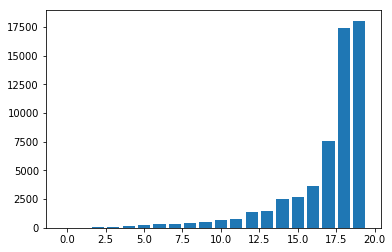

In [15]:
plt.bar(range(len(unique_labels)), sorted(label_counts))

Impala



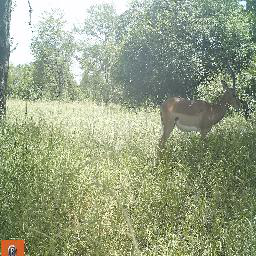

In [34]:
i = np.random.randint(0, len(tr_files_sp))
print(tr_labels_sp[i])
Image.open(os.path.join(root, tr_files_sp[i]))

# Class indexing

In [15]:
train_list_split_1 = os.path.join(root, 'SplitLists', 'train_split_1.txt')
train_list_split_2 = os.path.join(root, 'SplitLists', 'train_split_2.txt')
train_list_split_3 = os.path.join(root, 'SplitLists', 'train_split_3.txt')

In [16]:
labels_split_1 = []
with open(train_list_split_1, 'r') as f:
    for line in f:
        labels_split_1.append(line.split(' ')[1].replace('\n', ''))
        
labels_split_2 = []
with open(train_list_split_2, 'r') as f:
    for line in f:
        labels_split_2.append(line.split(' ')[1].replace('\n', ''))
        
labels_split_3 = []
with open(train_list_split_3, 'r') as f:
    for line in f:
        labels_split_3.append(line.split(' ')[1].replace('\n', ''))

In [17]:
label_set_split_1 = set(np.unique(labels_split_1))
label_set_split_2 = set(np.unique(labels_split_2))
label_set_split_3 = set(np.unique(labels_split_3))

In [27]:
np.unique(labels_split_1, return_counts=True)

In [28]:
unique_labels_indices_split_1 = {l:i for i, l in enumerate(np.unique(labels_split_1))}
unique_labels_indices_split_ = {l:i for i, l in enumerate(np.unique(labels_split_2))}
unique_labels_indices_split_3 = {l:i for i, l in enumerate(np.unique(labels_split_3))}

In [32]:
unique_labels_sp_1, counts_sp_1 = np.unique(labels_split_1, return_counts=True)
sorted(list(zip(unique_labels_sp_1, counts_sp_1)), key=lambda x:x[1], reverse=True)

[('Oribi', 7496),
 ('Elephant', 2766),
 ('Waterbuck', 2737),
 ('Warthog', 2580),
 ('Bushpig', 2126),
 ('Guineafowl_helmeted', 739),
 ('Sable_antelope', 686),
 ('Wildebeest', 610),
 ('Porcupine', 532),
 ('Hartebeest', 303),
 ('Duiker_red', 246),
 ('Hornbill_ground', 219),
 ('Mongoose_bushy_tailed', 190),
 ('Reedbuck', 181),
 ('Genet', 180),
 ('Samango', 129),
 ('Mongoose_dwarf', 16),
 ('Eland', 14),
 ('Lion', 10),
 ('Serval', 6)]

In [33]:
unique_labels_sp_2, counts_sp_2 = np.unique(labels_split_2, return_counts=True)
sorted(list(zip(unique_labels_sp_2, counts_sp_2)), key=lambda x:x[1], reverse=True)

[('Waterbuck', 44744),
 ('Baboon', 44043),
 ('Warthog', 21149),
 ('Civet', 1903),
 ('Vervet', 1846),
 ('Genet', 1049),
 ('Porcupine', 766),
 ('Buffalo', 650),
 ('Hartebeest', 519),
 ('Duiker_red', 386),
 ('Sable_antelope', 279),
 ('Aardvark', 264),
 ('Reedbuck', 166),
 ('Mongoose_marsh', 88),
 ('Mongoose_large_grey', 48),
 ('Guineafowl_crested', 38),
 ('Lion', 31),
 ('Eland', 29),
 ('Wildebeest', 21),
 ('Mongoose_dwarf', 8)]

In [34]:
unique_labels_sp_3, counts_sp_3 = np.unique(labels_split_3, return_counts=True)
sorted(list(zip(unique_labels_sp_3, counts_sp_3)), key=lambda x:x[1], reverse=True)

[('Bushbuck', 18059),
 ('Impala', 17398),
 ('Warthog', 7590),
 ('Nyala', 3619),
 ('Elephant', 2657),
 ('Genet', 2552),
 ('Kudu', 1426),
 ('Reedbuck', 1359),
 ('Porcupine', 773),
 ('Buffalo', 653),
 ('Hare', 468),
 ('Duiker_common', 457),
 ('Duiker_red', 318),
 ('Mongoose_marsh', 297),
 ('Honey_badger', 263),
 ('Wildebeest', 191),
 ('Mongoose_large_grey', 40),
 ('Serval', 34),
 ('Mongoose_dwarf', 16),
 ('Guineafowl_crested', 7)]

In [20]:
unique_labels_indices_split_1

{'Bushpig': 0,
 'Duiker_red': 1,
 'Eland': 2,
 'Elephant': 3,
 'Genet': 4,
 'Guineafowl_helmeted': 5,
 'Hartebeest': 6,
 'Hornbill_ground': 7,
 'Lion': 8,
 'Mongoose_bushy_tailed': 9,
 'Mongoose_dwarf': 10,
 'Oribi': 11,
 'Porcupine': 12,
 'Reedbuck': 13,
 'Sable_antelope': 14,
 'Samango': 15,
 'Serval': 16,
 'Warthog': 17,
 'Waterbuck': 18,
 'Wildebeest': 19}

In [21]:
unique_labels_indices_split_2

{'Aardvark': 0,
 'Baboon': 1,
 'Buffalo': 2,
 'Civet': 3,
 'Duiker_red': 4,
 'Eland': 5,
 'Genet': 6,
 'Guineafowl_crested': 7,
 'Hartebeest': 8,
 'Lion': 9,
 'Mongoose_dwarf': 10,
 'Mongoose_large_grey': 11,
 'Mongoose_marsh': 12,
 'Porcupine': 13,
 'Reedbuck': 14,
 'Sable_antelope': 15,
 'Vervet': 16,
 'Warthog': 17,
 'Waterbuck': 18,
 'Wildebeest': 19}

In [22]:
unique_labels_indices_split_3

{'Buffalo': 0,
 'Bushbuck': 1,
 'Duiker_common': 2,
 'Duiker_red': 3,
 'Elephant': 4,
 'Genet': 5,
 'Guineafowl_crested': 6,
 'Hare': 7,
 'Honey_badger': 8,
 'Impala': 9,
 'Kudu': 10,
 'Mongoose_dwarf': 11,
 'Mongoose_large_grey': 12,
 'Mongoose_marsh': 13,
 'Nyala': 14,
 'Porcupine': 15,
 'Reedbuck': 16,
 'Serval': 17,
 'Warthog': 18,
 'Wildebeest': 19}

In [254]:
union_label_indices = {l:i for i, l in enumerate(np.unique(labels_seas_1))}

In [262]:
add_i = len(union_label_indices)
for add in list(label_set_seas_2 - label_set_seas_1):
    union_label_indices[add] = add_i
    add_i += 1

In [263]:
len(union_label_indices)

34

In [265]:
label_set_seas_1 - label_set_seas_2

{'Duiker_common', 'Samango'}

In [266]:
label_set_seas_2 - label_set_seas_1

{'Bushbaby'}

In [264]:
union_label_indices

{'Aardvark': 0,
 'Baboon': 1,
 'Buffalo': 2,
 'Bushbuck': 3,
 'Bushpig': 4,
 'Civet': 5,
 'Duiker_common': 6,
 'Duiker_red': 7,
 'Elephant': 8,
 'Genet': 9,
 'Guineafowl_helmeted': 10,
 'Hare': 11,
 'Hartebeest': 12,
 'Honey_badger': 13,
 'Hornbill_ground': 14,
 'Impala': 15,
 'Kudu': 16,
 'Mongoose_banded': 17,
 'Mongoose_bushy_tailed': 18,
 'Mongoose_large_grey': 19,
 'Mongoose_marsh': 20,
 'Mongoose_slender': 21,
 'Mongoose_white_tailed': 22,
 'Nyala': 23,
 'Oribi': 24,
 'Porcupine': 25,
 'Reedbuck': 26,
 'Sable_antelope': 27,
 'Samango': 28,
 'Vervet': 29,
 'Warthog': 30,
 'Waterbuck': 31,
 'Wildebeest': 32,
 'Bushbaby': 33}